todo
- problem description (Kasia) DONE
todo test
- problem description (Kasia)
- opisy wykresow (Kasia)
- co robimy z unknown values w zmiennych kategoricznych (An)
- column description https://storage.googleapis.com/kaggle-forum-message-attachments/1146167/17870/DataDict.JPG (Kasia) (DONE)
- typ zmiennej dopisac (Kasia)
- wykresy zmiennych z attrition flag (An)
- group variables for analysis (Kasia)
- PCA analysis (An)

# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data


## Problem description

 The business manager, that is taking care of consumer credit card portfolio, is concerned about the increasing number of customers leaving their credit card services. To address this issue, the manager wishes to proactively identify customers at risk of churning (becoming attrited). The dataset includes information on 10,000 customers with features such as age, salary, marital status, credit card limit, and credit card category among others. The primary objective is to analyze this dataset to find patterns and factors contributing to customer attrition. By leveraging this information, the manager aims to develop a predictive model that can identify customers likely to discontinue their services. The goal is to enable the bank to intervene with these customers, offering improved services to potentially reverse their decisions and mitigate customer churn.

## Column description
| No.| Column      | Description | Type |
| -- | ----------- | ----------- | -- |
| 1. | CLIENTNUM | Client number. Unique identifier for the customer holding the account | Numerical Discrete|
| 2. | Attrition_Flag | Internal event (customer activity) variable - if the account is closed then 1 else 0 | Binary|
| 3. | Customer_Age   | Customer's Age in Years |Numerical Discrete | 
| 4. | Gender | M=Male, F=Female |Binary |
| 5. | Dependent_count | Number of dependents - people who are financially (and otherwise) dependent on you.|Numerical Discrete| 
| 6. | Education_Level | Educational Qualification of the account holder (example: high school, college graduate, etc.) | Categorical Ordinal| 
| 7. |Marital_Status| Married, Single, Divorced, Unknown |Categorical Nominal |
| 8. | Income_Category | Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >) | Categorical Ordinal| 
| 9. | Card_Category | Type of Card (Blue, Silver, Gold, Platinum) | Categorical Ordinal | 
| 10. | Months_on_book | Period of relationship with bank | Numerical Discrete| 
| 11. |Total_Relationship_Count| Total no. of products held by the customer |Numerical Discrete |
| 12. | Months_Inactive_12_mon | No. of months inactive in the last 12 months |Numerical Discrete |
| 13. | Contacts_Count_12_mon | No. of Contacts in the last 12 months | Numerical Discrete|
| 14. | Credit_Limit | Credit Limit on the Credit Card | Numerical Continuous|
| 15. | Total_Revolving_Bal | Total Revolving Balance on the Credit Card |Numerical Discrete |
| 16. | Avg_Open_To_Buy | Open to Buy Credit Line (Average of last 12 months) |Numerical Continuous |
| 17. | Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1) | Numerical Continuous|
| 18. | Total_Trans_Amt | Total Transaction Amount (Last 12 months) | Numerical Discrete|
| 19. | Total_Trans_Ct | Total Transaction Count (Last 12 months) |Numerical Discrete |
| 20. | Total_Ct_Chng_Q4_Q1 | Change in Transaction Count (Q4 over Q1) |Numerical Continuous |
| 21. | Avg_Utilization_Ratio | Average Card Utilization Ratio |Numerical Continuous |

# Dependencies loading

In [108]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data loading

In [2]:
data = pd.read_csv('input_data/BankChurners.csv')
data = data[data.columns[:-2]]
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Getting rid of two last columns in dataset as they are redundant

# Data info

Qucik sense check:

In [3]:
sum(data.CLIENTNUM.value_counts()>1)

0

It looks like we don't have duplicate customers

## Null values

In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

We can see that there are no null values - that is because they are stored as "Unknown" 

In [5]:
data.replace("Unknown",np.nan).isna().sum()[lambda x:x>0]

Education_Level    1519
Marital_Status      749
Income_Category    1112
dtype: int64

In [6]:
round(data.replace("Unknown",np.nan).isna().sum()[lambda x:x>0]/data.shape[0]*100,2)

Education_Level    15.00
Marital_Status      7.40
Income_Category    10.98
dtype: float64

As we can see most nans are in Education_Level - around 15%, 11% of income category are nans and 7,4% of martial status are unknown

We will deal with those later

### Transformation of "Unknown" to null

In [7]:
data.replace("Unknown",np.nan,inplace = True)

## Target variable

### Converting target variable

In [8]:
data['Attrition_Flag'] = data['Attrition_Flag'].map( {'Attrited Customer': 1, 'Existing Customer': 0} ).astype(int)

Attirited customer = 1

Existing customer = 0

### Target variable description

In [9]:
(((data
.groupby("Attrition_Flag")
.agg({'Attrition_Flag':["count"]})
)['Attrition_Flag']
.reset_index()
)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Attrition_Flag,count,percent_of_all
0,0,8500,83.93
1,1,1627,16.07


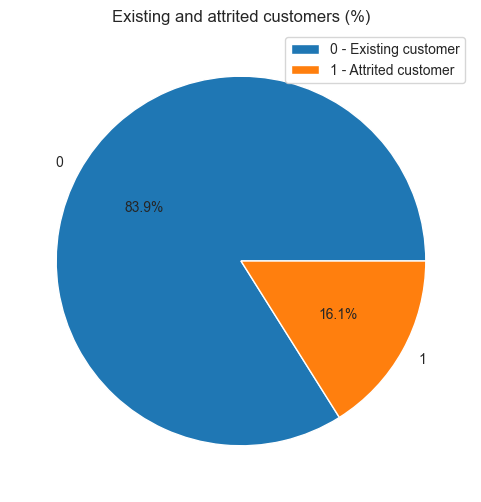

In [10]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Attrition_Flag'].value_counts(),labels = data['Attrition_Flag'].value_counts().index,autopct='%1.1f%%')
plt.legend(["0 - Existing customer","1 - Attrited customer"], loc = "upper right")
plt.title("Existing and attrited customers (%)")
plt.show()

Most of customers are existing Customers. Only 16.07% of customers closed their accounts.

## Feature description

### Categorical

In [11]:
data.dtypes[data.dtypes == 'object']

Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [12]:
data.describe(include=['O'])

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,8608,9378,9015,10127
unique,2,6,3,5,4
top,F,Graduate,Married,Less than $40K,Blue
freq,5358,3128,4687,3561,9436


In our dataset we have 5 categorical features:

#### Income category

In [13]:
data["Income_Category"].dropna().shape[0]

9015

In [14]:
(((data
.groupby("Income_Category")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data["Income_Category"].dropna().shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Income_Category,count,attrition_count,attrition_rate,percent_of_all
0,$120K +,727,126,17.33,8.06
1,$40K - $60K,1790,271,15.14,19.86
2,$60K - $80K,1402,189,13.48,15.55
3,$80K - $120K,1535,242,15.77,17.03
4,Less than $40K,3561,612,17.19,39.50


We will transform Income_Category to numerical discrete variable. The higher the numerical value, the wealthier the customer.

In [15]:
data["Income_Category"] = data["Income_Category"].map({'Less than $40K':0,"$40K - $60K":1,"$60K - $80K":2,"$80K - $120K":3,"$120K +":4}).astype("int64", errors="ignore")

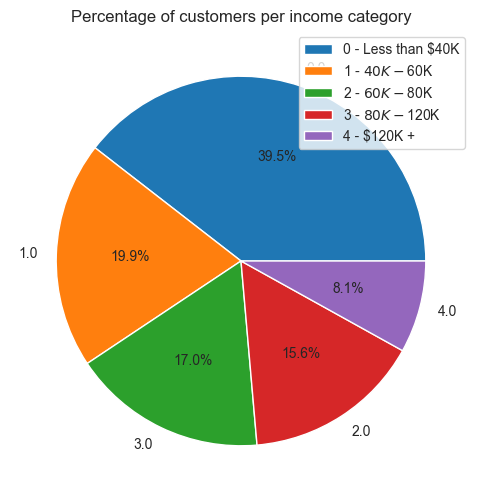

In [16]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Income_Category'].value_counts(),labels = data['Income_Category'].value_counts().index,autopct='%1.1f%%')
plt.legend(["0 - Less than $40K","1 - $40K - $60K", "2 - $60K - $80K" ,"3 - $80K - $120K", "4 - $120K +"],loc="upper right")
plt.title("Percentage of customers per income category")
plt.show()

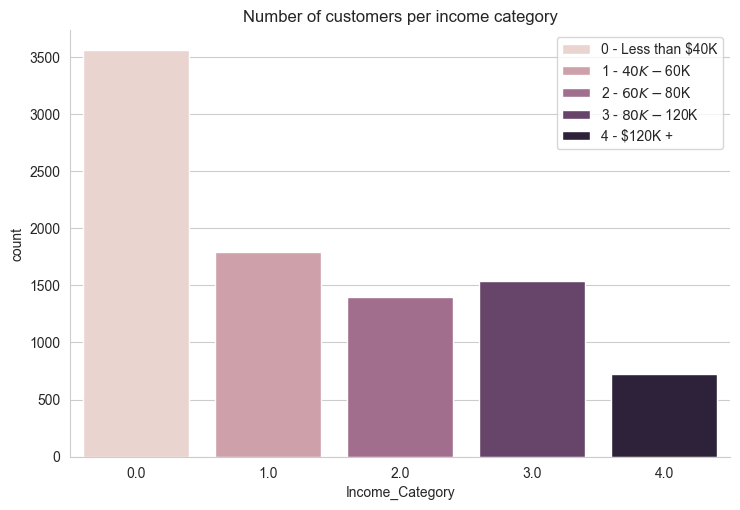

In [17]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.catplot(data[data["Income_Category"].notna()], x = "Income_Category", kind = 'count', hue = "Income_Category", legend = False, height = 5, aspect = 3/2)
plt.legend(["0 - Less than $40K","1 - $40K - $60K", "2 - $60K - $80K" ,"3 - $80K - $120K", "4 - $120K +"])
plt.title("Number of customers per income category")
plt.show()

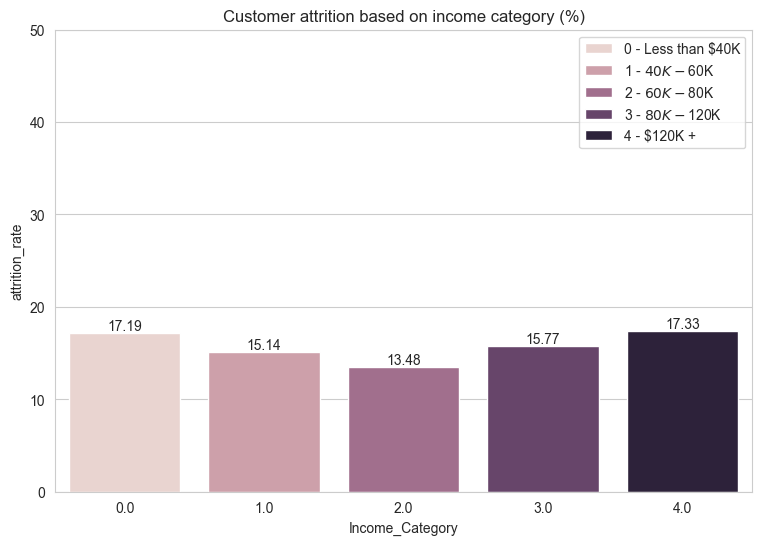

In [18]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
ax = sns.barplot(
data = (((data
.groupby("Income_Category")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.rename(columns={"sum":"attrition_count"})),
y = "attrition_rate",x = "Income_Category", hue = 'Income_Category', legend = False, errorbar = None
)
ax.set(ylim=(0, 50))
for i in ax.containers:
    ax.bar_label(i,)
ax.legend(["0 - Less than $40K","1 - $40K - $60K", "2 - $60K - $80K" ,"3 - $80K - $120K", "4 - $120K +"])
plt.title("Customer attrition based on income category (%)")
plt.show()

Based on above graphs we make a conclusion  that most customers are recognised as attrited in 4th income category( earning $120k+) and the least customers attrited in the 2nd category (earning $60K- $80K)

#### Martial status

In [19]:
(((data
.groupby("Marital_Status")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Marital_Status,count,attrition_count,attrition_rate,percent_of_all
0,Divorced,748,121,16.18,7.39
1,Married,4687,709,15.13,46.28
2,Single,3943,668,16.94,38.94


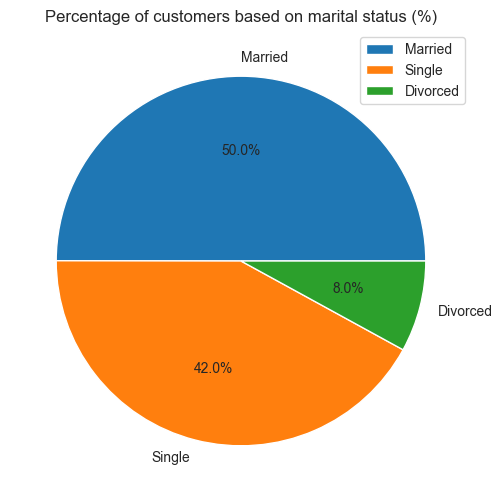

In [20]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Marital_Status'].value_counts(),labels = data['Marital_Status'].value_counts().index,autopct='%1.1f%%')
plt.title("Percentage of customers based on marital status (%)")
plt.legend()
plt.show()

Most of bank's customers are married (46,3%)

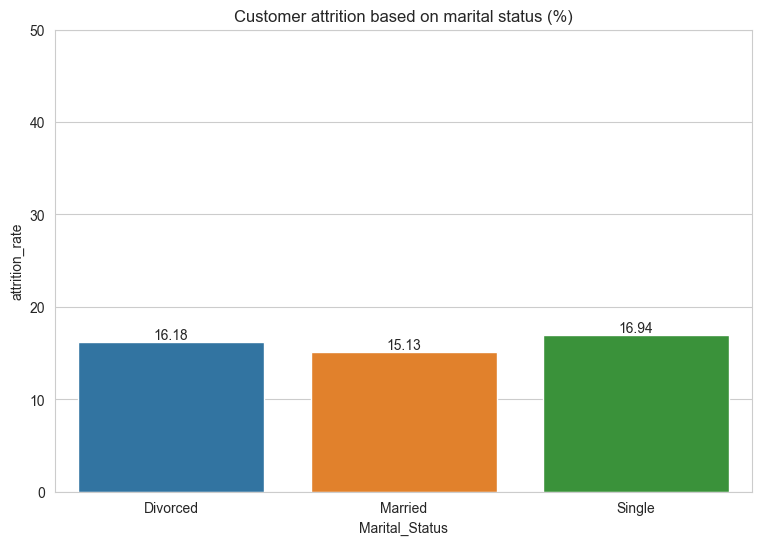

In [21]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
ax = sns.barplot(
data = (((data
.groupby("Marital_Status")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.rename(columns={"sum":"attrition_count"})),
y = "attrition_rate",x = "Marital_Status", hue = 'Marital_Status', legend = False, errorbar = None
)
ax.set(ylim=(0, 50))
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Customer attrition based on marital status (%)")
plt.show()

Based on above graphs we make a conclusion  that most customers are recognised as attrited when being single.

#### Card category

In [22]:
(((data
.groupby("Card_Category")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Card_Category,count,attrition_count,attrition_rate,percent_of_all
0,Blue,9436,1519,16.10,93.18
1,Gold,116,21,18.10,1.15
2,Platinum,20,5,25.00,0.20
3,Silver,555,82,14.77,5.48


We can see that we have 4 different card types. In dataset description we weren't provided with meanging of each card type. We can only assume that:

Blue - this is the "cheapest card", with fewest bonuses.

Silver - this is the second card if it comes to costs of maintanance.

Gold - this is next card if it comes to costs of maintanance.

Platinum - this is the most expensive card if it comes to maintenance fee, this card is supposedly for "premium" users.

Now taking this assumptions we will transform those categorical variables into numerical discrete variable. The higher the value, the more expensive is the card. 

In [23]:
data['Card_Category'] = data["Card_Category"].map({"Blue":0,"Silver":1,"Gold":2,"Platinum":3}).astype("int64")

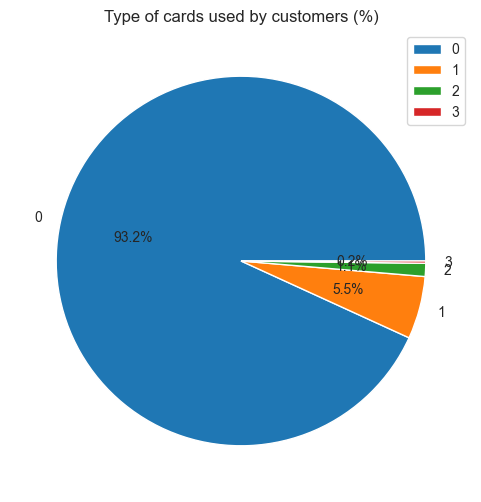

In [24]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Card_Category'].value_counts(),labels = data['Card_Category'].value_counts().index,autopct='%1.1f%%')
plt.title("Type of cards used by customers (%)")
plt.legend()
plt.show()

More than 90% of customers were in possesion of the cheapest- Blue Card.

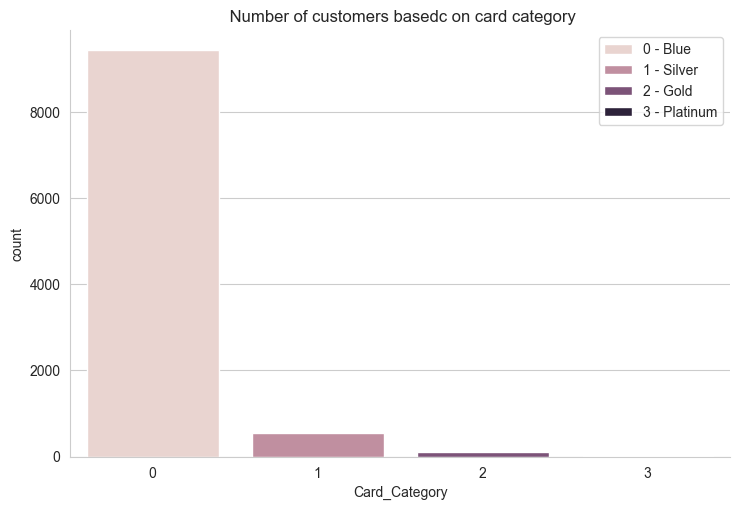

In [25]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.catplot(data[data["Card_Category"].notna()], x = "Card_Category", kind = 'count', hue = "Card_Category", legend = False, height = 5, aspect = 3/2)
plt.legend(["0 - Blue", "1 - Silver", "2 - Gold", "3 - Platinum"])
plt.title(" Number of customers basedc on card category")
plt.show()

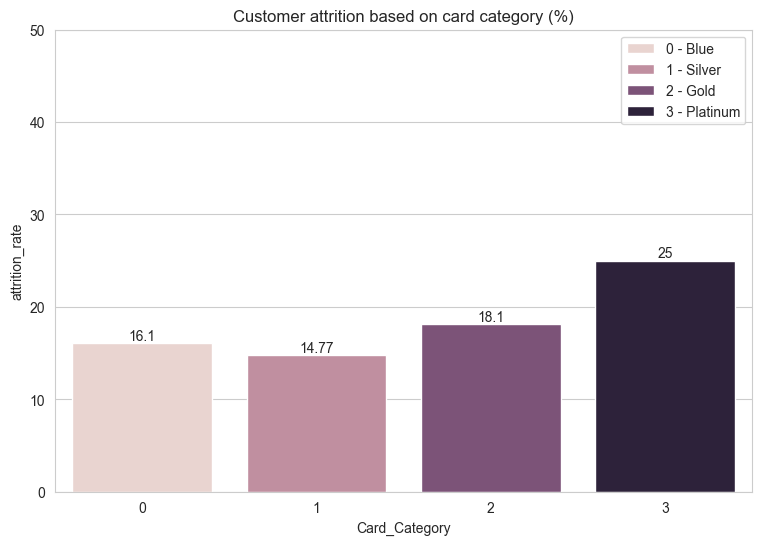

In [26]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
ax = sns.barplot(
data = (((data
.groupby("Card_Category")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.rename(columns={"sum":"attrition_count"})),
y = "attrition_rate",x = "Card_Category", hue = 'Card_Category', legend = False, errorbar = None
)
ax.legend(["0 - Blue", "1 - Silver", "2 - Gold", "3 - Platinum"])
ax.set(ylim=(0, 50))
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Customer attrition based on card category (%)")
plt.show()

35% of customers, that were premium clients with platinum card, attrited. That is significanty more than the rest of the customers with different card types. We have to also take into account that the platinum card group is a very small unit with only 20 observations.


#### Education level

In [27]:
(((data
.groupby("Education_Level")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Education_Level,count,attrition_count,attrition_rate,percent_of_all
0,College,1013,154,15.20,10.00
1,Doctorate,451,95,21.06,4.45
2,Graduate,3128,487,15.57,30.89
3,High School,2013,306,15.20,19.88
4,Post-Graduate,516,92,17.83,5.10
5,Uneducated,1487,237,15.94,14.68


We can map values of variable Education_Level to numerical ordinary values. The higher the number, the higher the education of cusotmer

In [28]:
data['Education_Level'] = data["Education_Level"].map({"Uneducated":0,"High School":1,"College":2,"Graduate":3,"Post-Graduate":4,"Doctorate":5}).astype("int64", errors = "ignore")

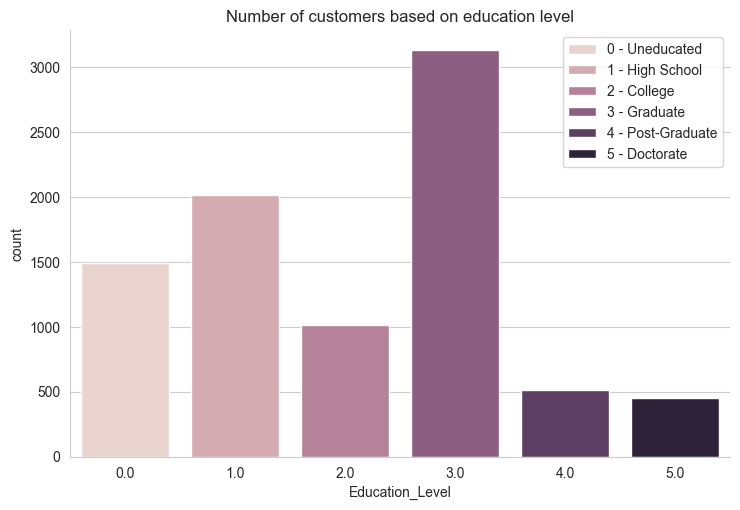

In [29]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.catplot(data[data["Education_Level"].notna()], x = "Education_Level", kind = 'count', hue = "Education_Level", legend = False, height = 5, aspect = 3/2)
plt.legend(["0 - Uneducated", "1 - High School", "2 - College", "3 - Graduate", "4 - Post-Graduate", "5 - Doctorate"], loc = "upper right")
plt.title("Number of customers based on education level")
plt.show()

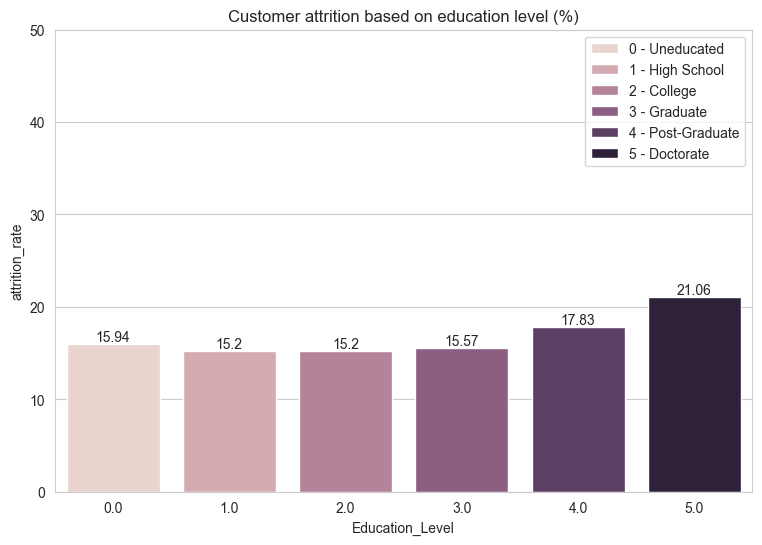

In [30]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
ax = sns.barplot(
data = (((data
.groupby("Education_Level")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.rename(columns={"sum":"attrition_count"})),
y = "attrition_rate",x = "Education_Level", hue = 'Education_Level', legend = False, errorbar = None
)
plt.legend(["0 - Uneducated", "1 - High School", "2 - College", "3 - Graduate", "4 - Post-Graduate", "5 - Doctorate"], loc = "upper right")
ax.set(ylim=(0, 50))
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Customer attrition based on education level (%)")
plt.show()

The most educated clients, Post-Graduates and Doctorates, attrited respectively by 17,83% and 21,06% within their educational group.

#### Gender

In [31]:
(((data
.groupby("Gender")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.assign(percent_of_all = lambda x: round(x['count']/data.shape[0],4)*100)
.rename(columns={"sum":"attrition_count"}))

,Gender,count,attrition_count,attrition_rate,percent_of_all
0,F,5358,930,17.36,52.91
1,M,4769,697,14.62,47.09


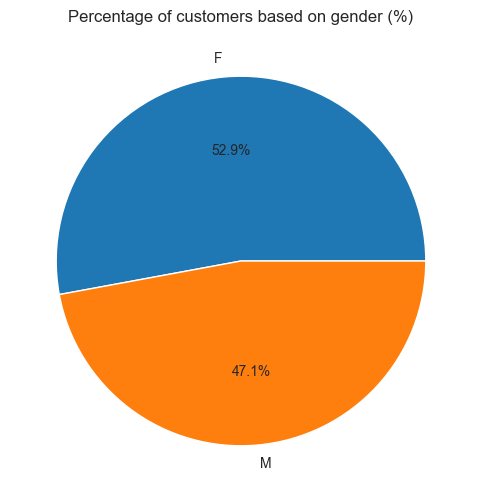

In [32]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['Gender'].value_counts(),labels = data['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title("Percentage of customers based on gender (%)")
plt.show()

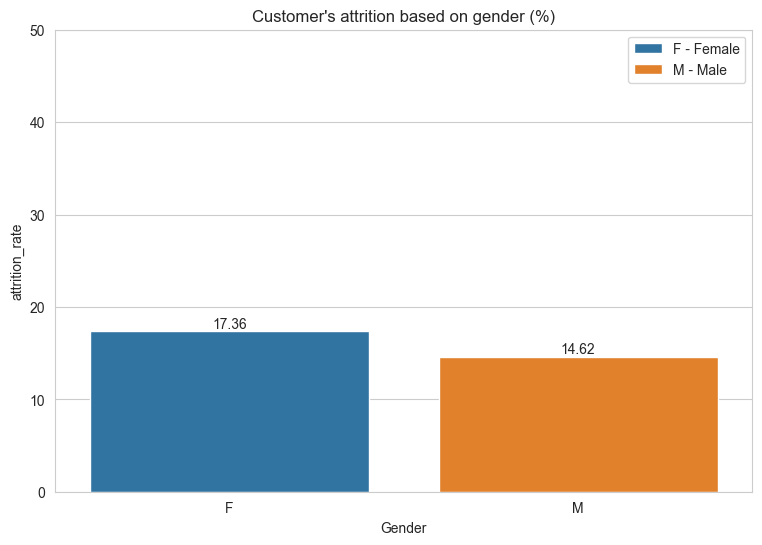

In [33]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
ax = sns.barplot(
data = (((data
.groupby("Gender")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.rename(columns={"sum":"attrition_count"})),
y = "attrition_rate", x = "Gender", hue = 'Gender', legend = False, errorbar = None
)
plt.legend(labels = ["F - Female", "M - Male"], loc = "upper right")
ax.set(ylim=(0, 50))
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Customer's attrition based on gender (%)")
plt.show()

In our dataset there's a slight imbalance in gender distribution, with a abou 6% higher representation of female customers compared to male customers. Females also wttrited more frequently than males.

### Numerical

On this step of our Exploratory Data Analysis
we would like to group some of the numerical variables in order to analyse them together and not individually

In [34]:
data.drop(columns=['CLIENTNUM',"Attrition_Flag","Education_Level", "Income_Category","Card_Category"]).dtypes[data.dtypes != 'object']
# we are not taking into account variables that we described earlier

Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [35]:
data.drop(columns=['CLIENTNUM',"Attrition_Flag","Education_Level", "Income_Category","Card_Category"]).describe()


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


On the graph below we can see correlation of our numerical variables.

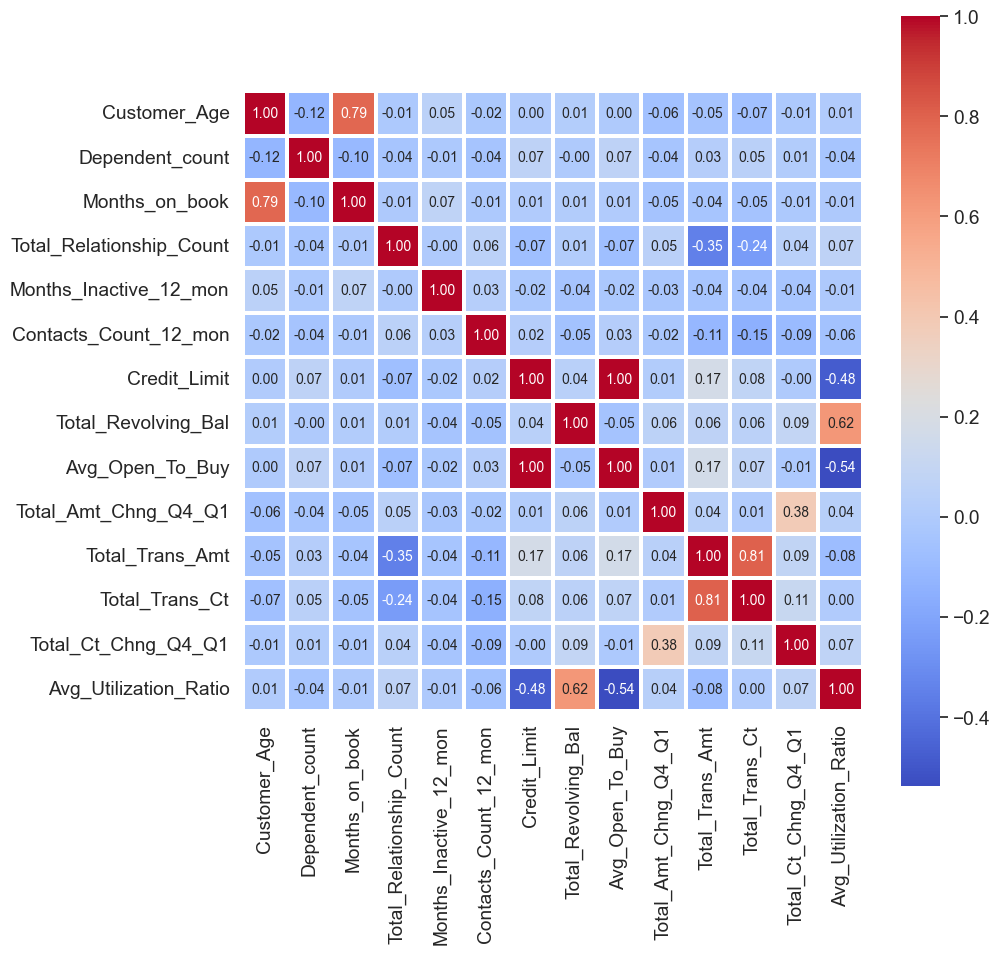

In [125]:
corr = data.drop(columns=['CLIENTNUM',"Attrition_Flag","Education_Level", "Income_Category","Card_Category"]).corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10},
    cmap = 'coolwarm'
)
plt.show()

#### Age

In [37]:
data["Customer_Age"].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

max and min values looks good - we don't have extraordinary age values

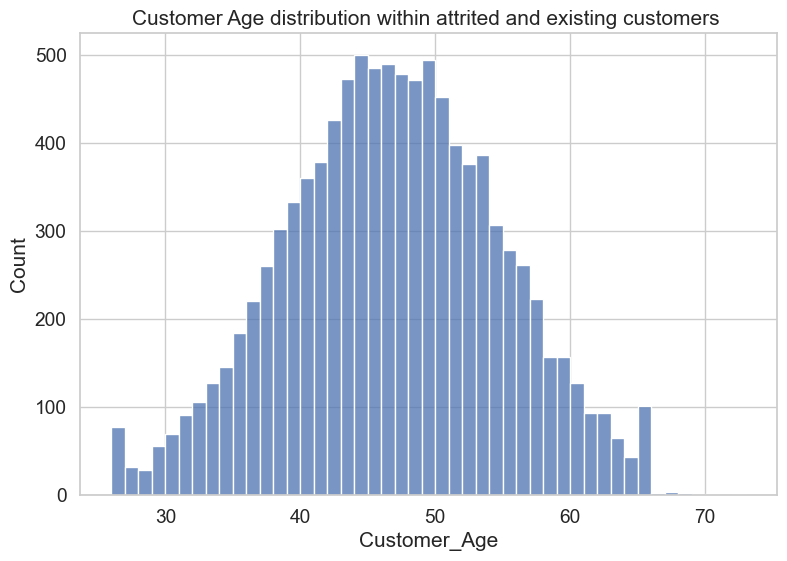

In [159]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data, x = "Customer_Age")
plt.title("Customer Age distribution within attrited and existing customers ")
plt.show()

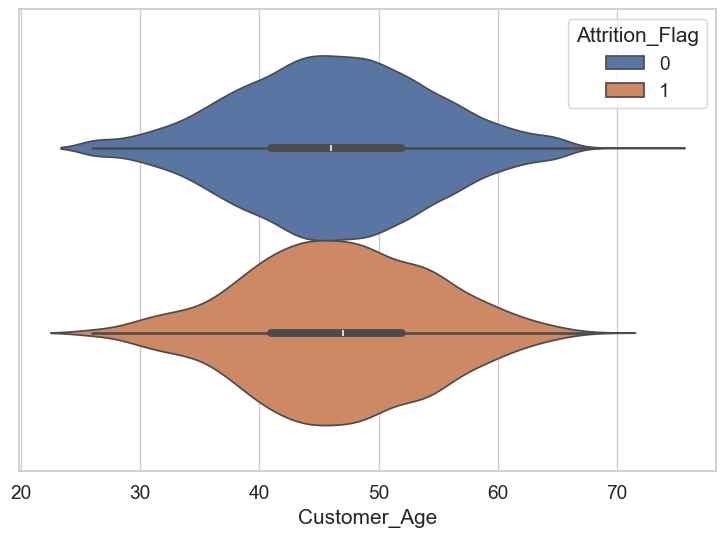

In [178]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data, x = "Customer_Age", hue = "Attrition_Flag")
plt.show()

#### Dependent count

In [39]:
data['Dependent_count'].describe()

count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64

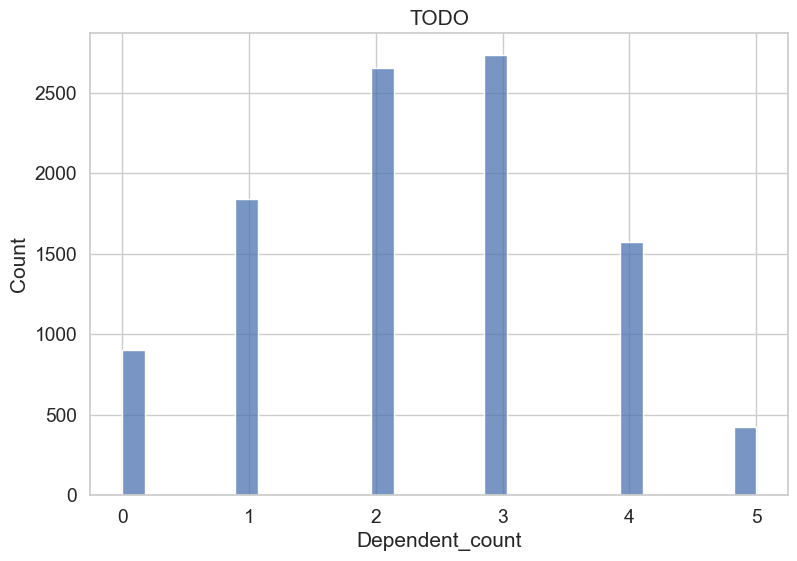

In [161]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data, x = "Dependent_count")
plt.title("TODO")
plt.show()

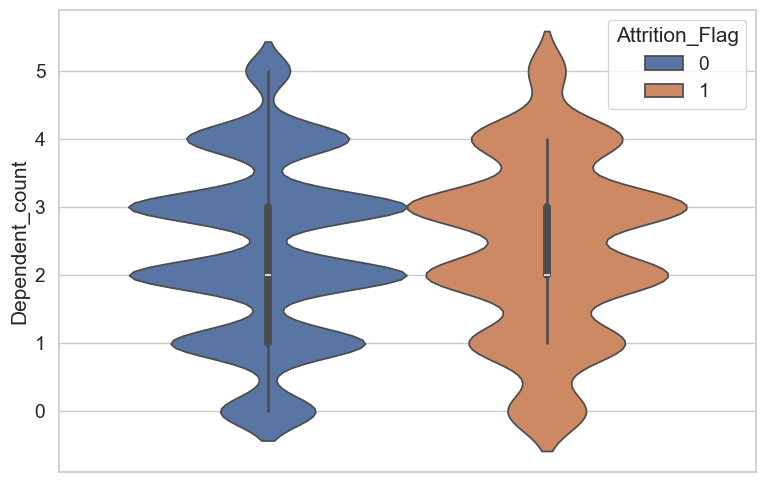

In [162]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data, y = "Dependent_count", hue = "Attrition_Flag")
plt.show()

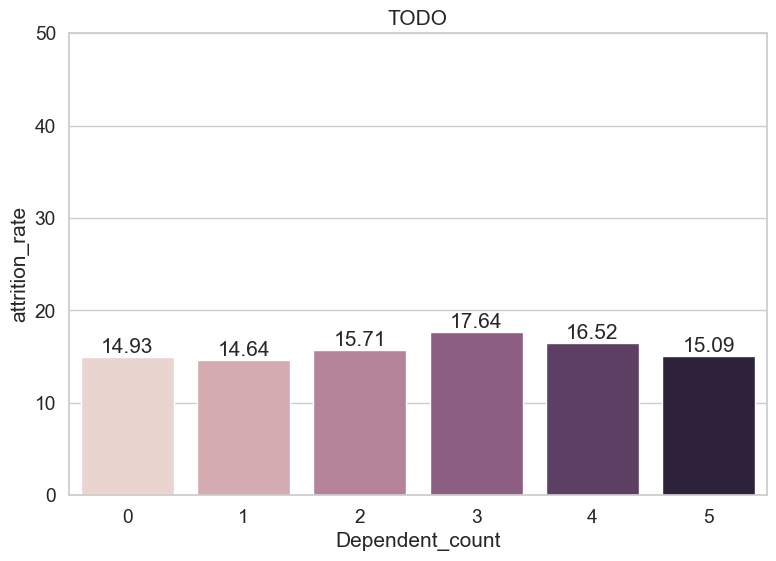

In [41]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
ax = sns.barplot(
data = (((data
.groupby("Dependent_count")
.agg({'Attrition_Flag':["count","sum"]})
)['Attrition_Flag']
.reset_index()
)
.assign(attrition_rate = lambda x: round(x['sum']/x['count'],4)*100)
.rename(columns={"sum":"attrition_count"})),
y = "attrition_rate",x = "Dependent_count", hue = 'Dependent_count', legend = False, errorbar = None
)
ax.set(ylim=(0, 50))
for i in ax.containers:
    ax.bar_label(i,)
plt.title("TODO")
plt.show()

#### Age and Dependent count

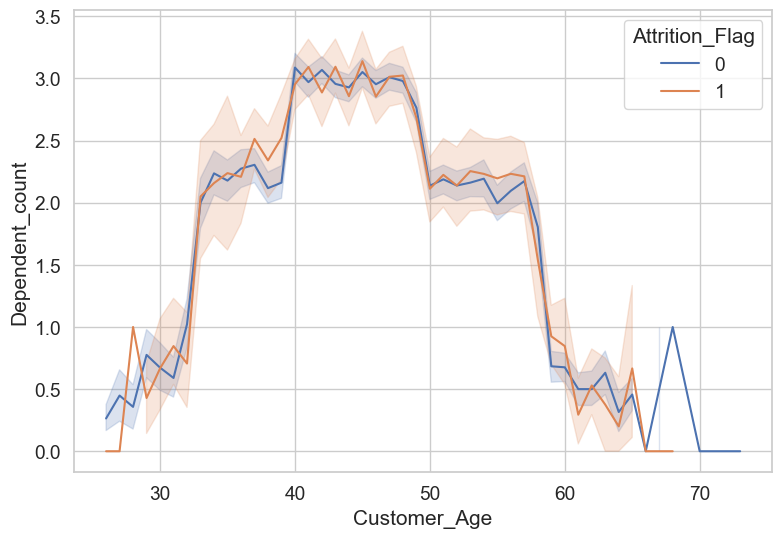

In [42]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.lineplot(data,x = "Customer_Age" ,y = "Dependent_count", hue = "Attrition_Flag")
plt.show()

#### Months on book

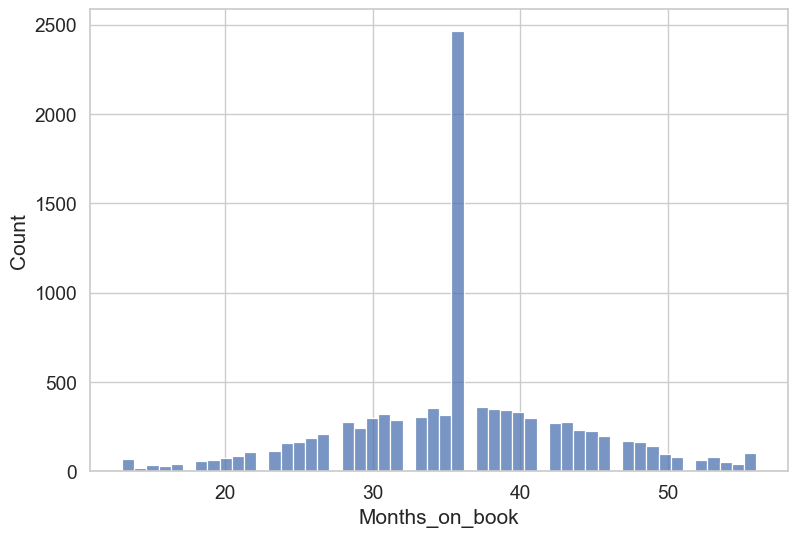

In [43]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data,x = "Months_on_book")
plt.show()

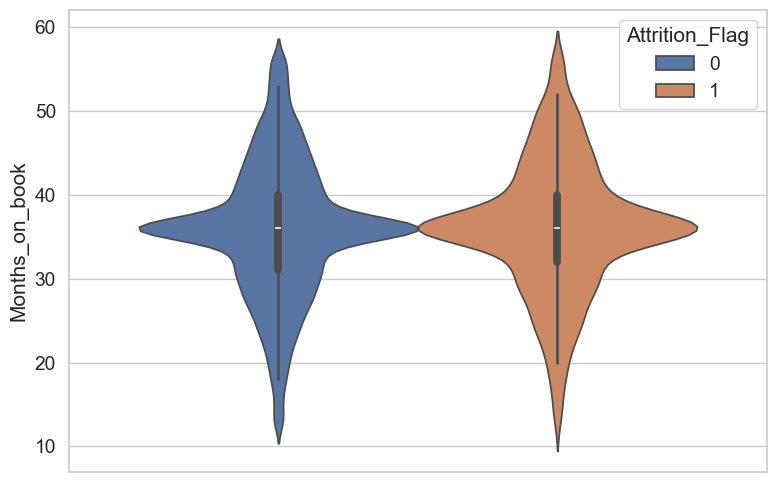

In [158]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data,y = "Months_on_book", hue = "Attrition_Flag")
plt.show()

#### Months on book and Age 

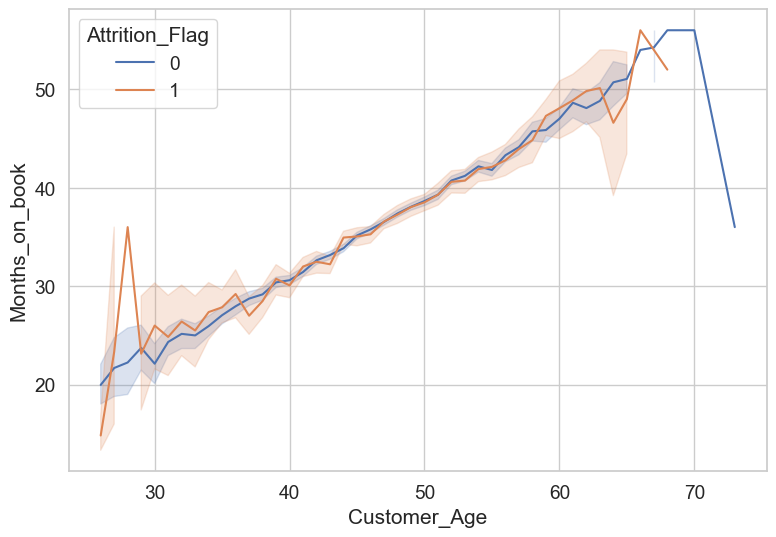

In [153]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.lineplot(data,x = "Customer_Age" ,y = "Months_on_book", hue = "Attrition_Flag")
plt.show()

#### Months on book and month inactive

#### Total transaction count

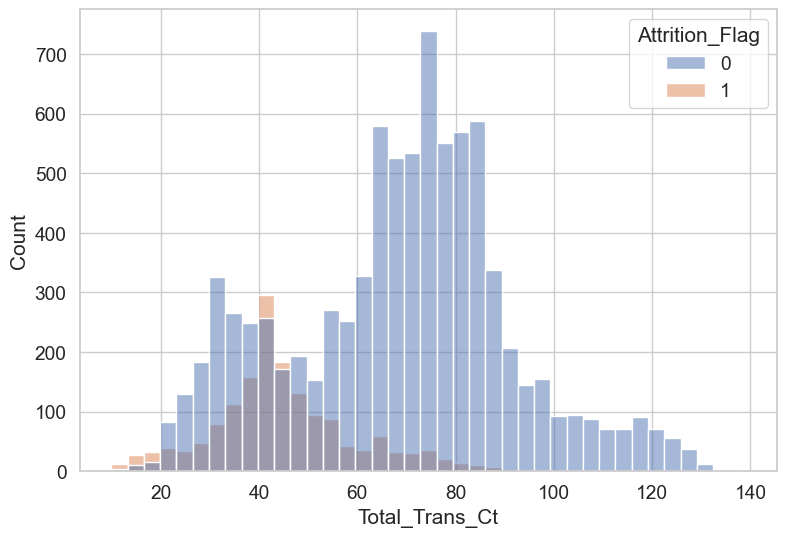

In [46]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data,x = "Total_Trans_Ct", hue = "Attrition_Flag")
plt.show()

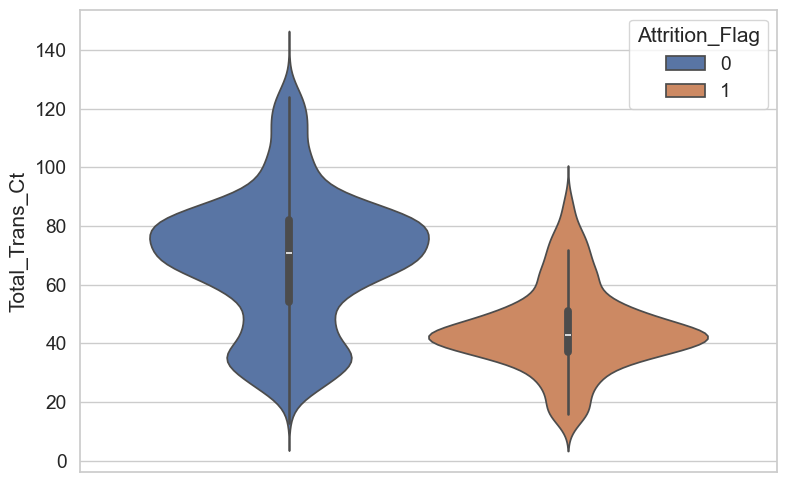

In [157]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data,y = "Total_Trans_Ct", hue = "Attrition_Flag")
plt.show()

#### Total transaction amount

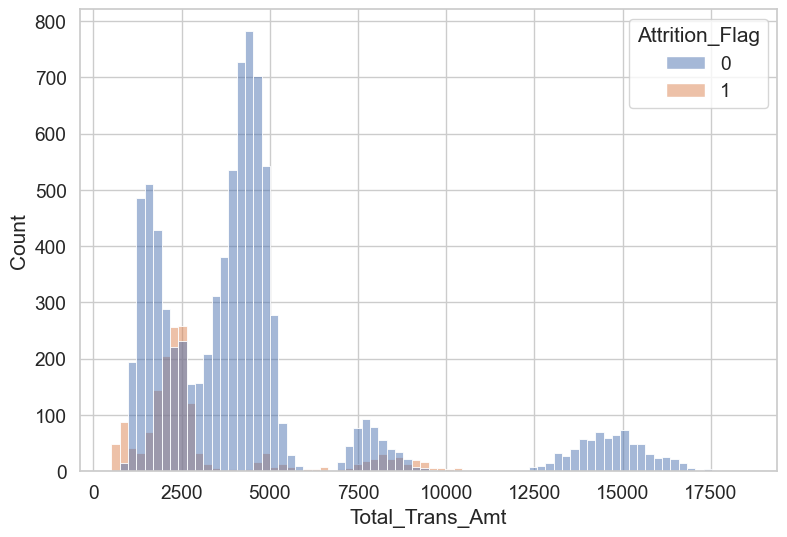

In [47]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data,x = "Total_Trans_Amt", hue = "Attrition_Flag")
plt.show()

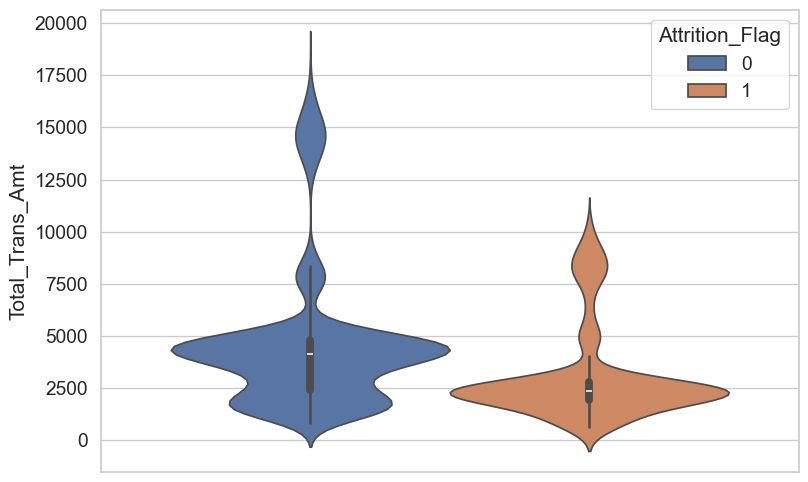

In [70]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data,y = "Total_Trans_Amt", hue = "Attrition_Flag")
plt.show()

#### Total transactions count and total transaction amount

<Figure size 900x600 with 0 Axes>

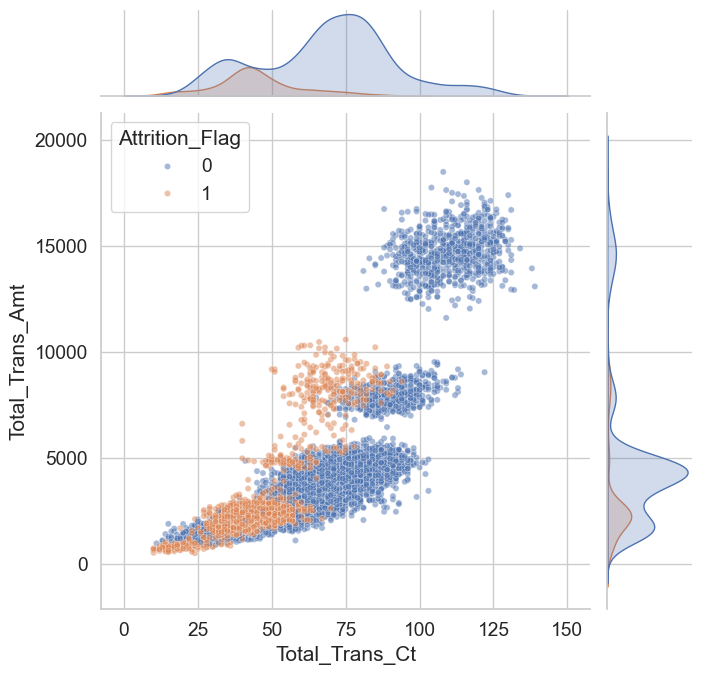

In [195]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.jointplot(data,x = "Total_Trans_Ct" ,y = "Total_Trans_Amt", hue = "Attrition_Flag", s = 20, alpha = 0.5,height=7)
plt.show()

##### Average transaction

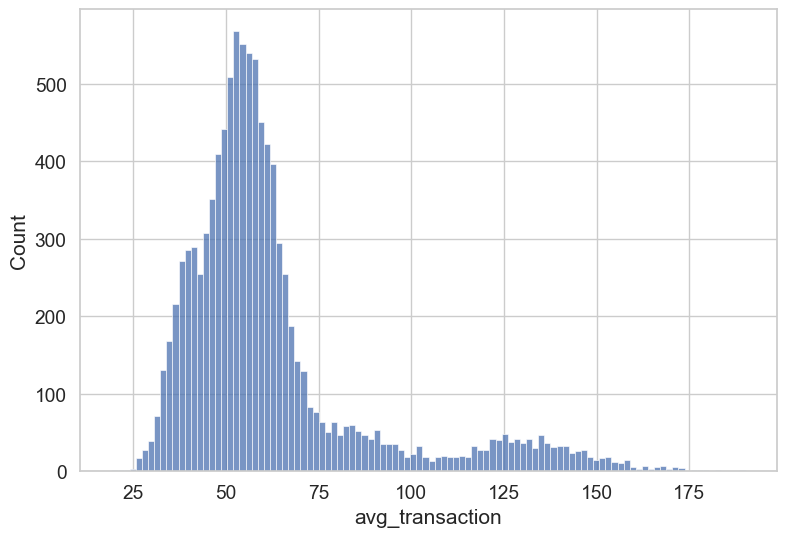

In [164]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot((data
.assign(avg_transaction = lambda x: x['Total_Trans_Amt']/x['Total_Trans_Ct'])
),
x = "avg_transaction")
plt.show()

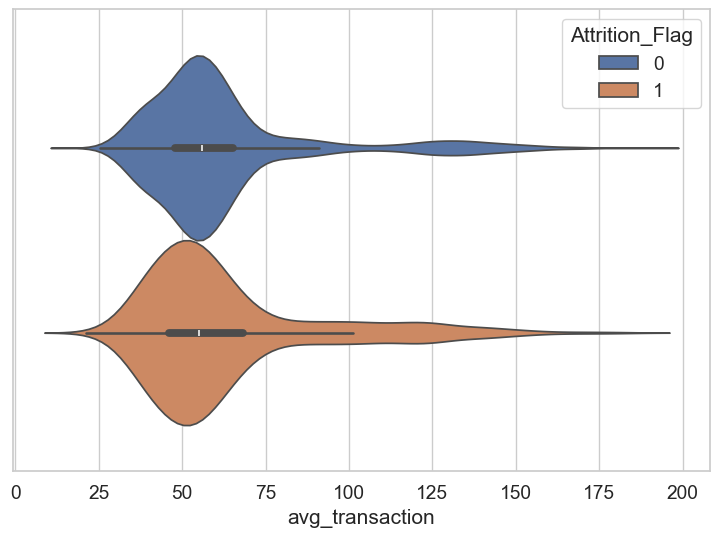

In [163]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot((data
.assign(avg_transaction = lambda x: x['Total_Trans_Amt']/x['Total_Trans_Ct'])
),
x = "avg_transaction", hue = "Attrition_Flag")
plt.show()

#### Total count change in transaction Q4 over Q1

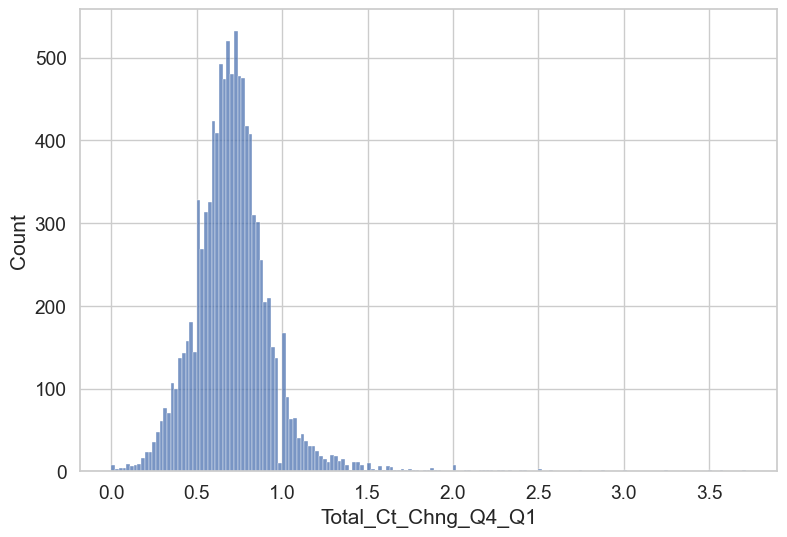

In [173]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data,x = "Total_Ct_Chng_Q4_Q1")
plt.show()

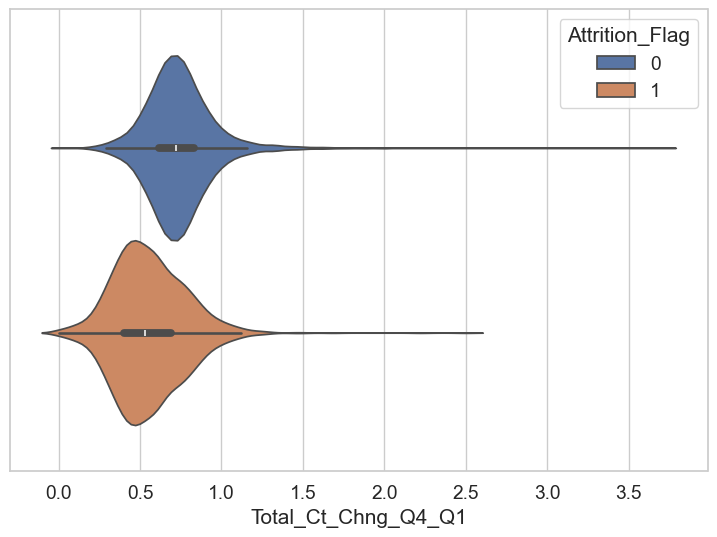

In [179]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data, x = "Total_Ct_Chng_Q4_Q1", hue = "Attrition_Flag")
plt.show()

#### Total amount change in transaction Q4 over Q1

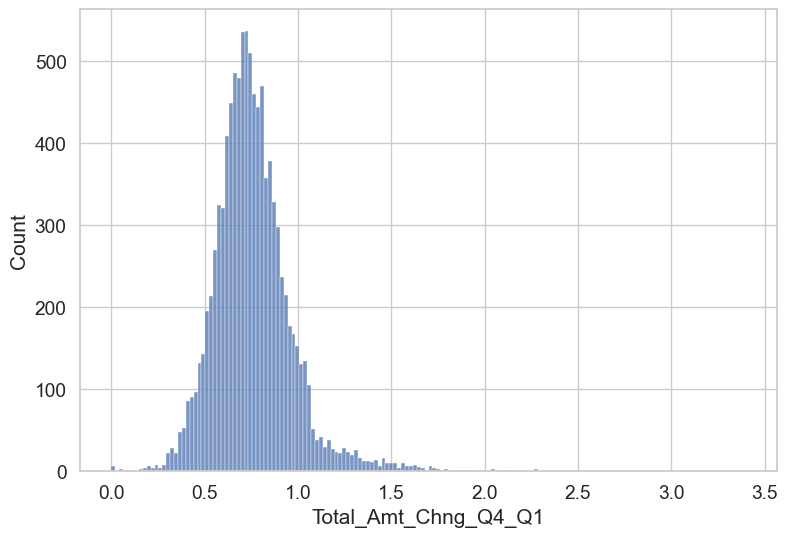

In [174]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data,x = "Total_Amt_Chng_Q4_Q1")
plt.show()

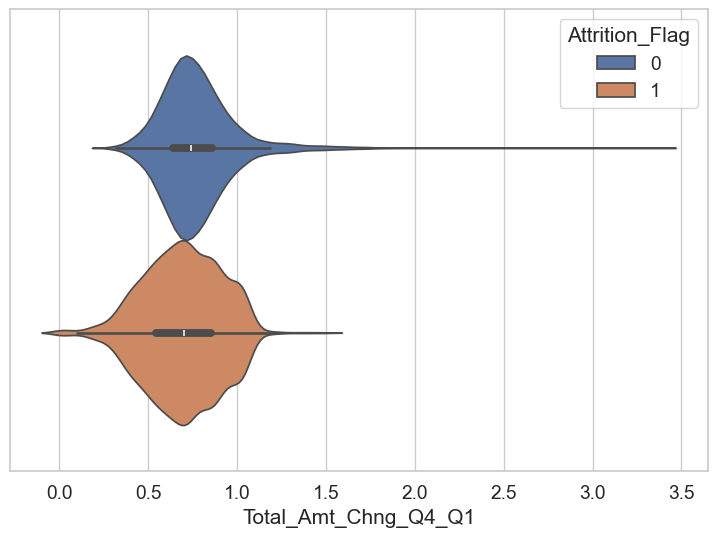

In [180]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data, x = "Total_Amt_Chng_Q4_Q1", hue = "Attrition_Flag")
plt.show()

#### Total count and amount change in transaction Q4 over Q1

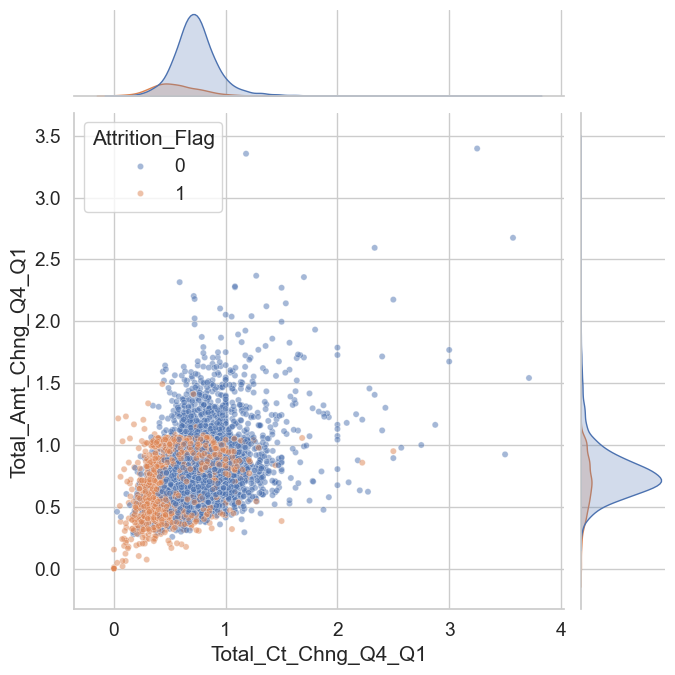

In [194]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
sns.jointplot(data,x = "Total_Ct_Chng_Q4_Q1" ,y = "Total_Amt_Chng_Q4_Q1", hue = "Attrition_Flag", s = 20, alpha = 0.5,height=7)
plt.show()

#### Credit Limit

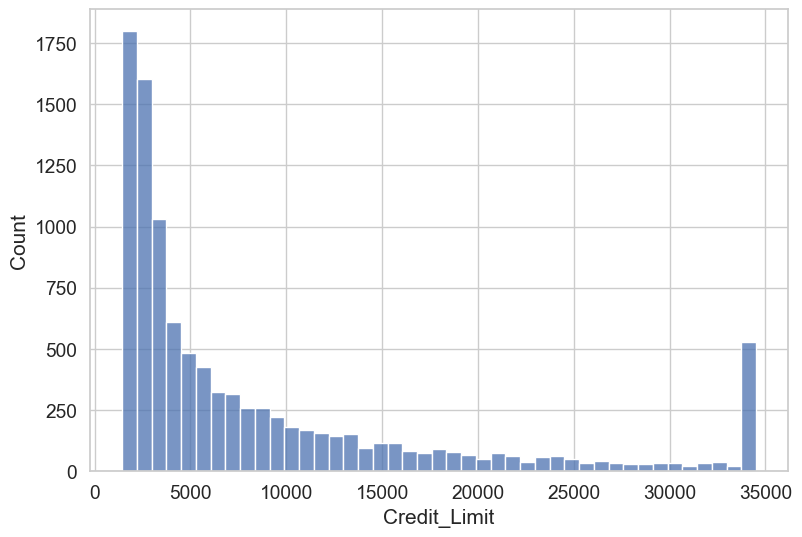

In [130]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data,x = "Credit_Limit")
plt.show()

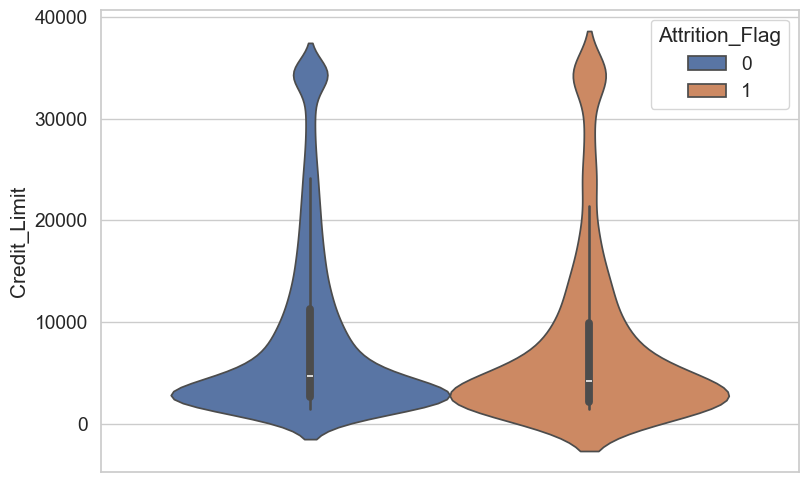

In [165]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data,y = "Credit_Limit", hue = "Attrition_Flag")
plt.show()

#### Average open to buy

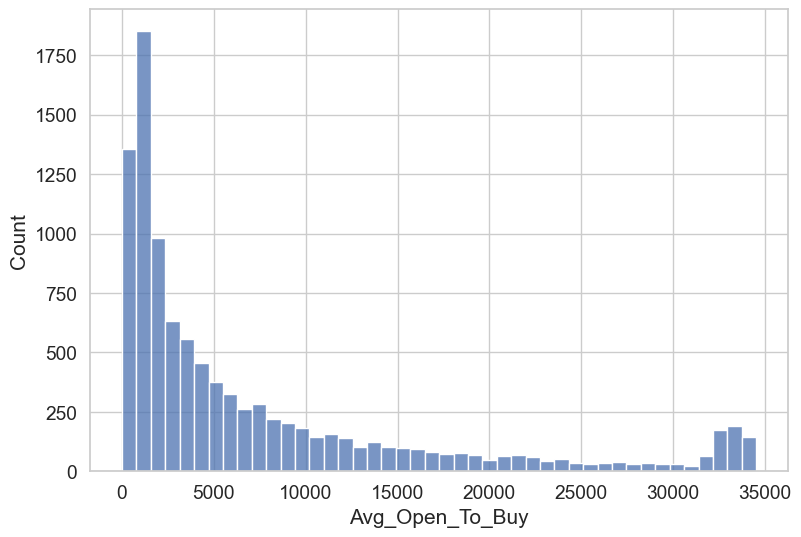

In [166]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.histplot(data,x = "Avg_Open_To_Buy")
plt.show()

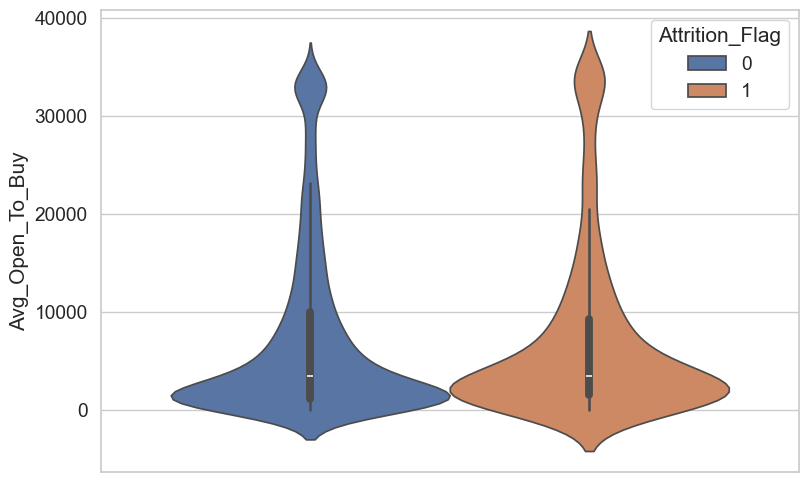

In [170]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.violinplot(data,y = "Avg_Open_To_Buy", hue = "Attrition_Flag")
plt.show()

#### Credit limit and Average open to buy 

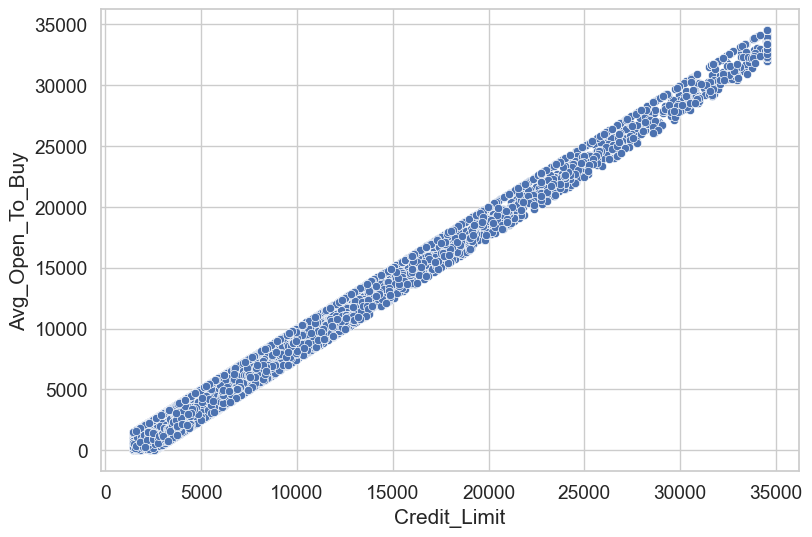

In [172]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(9, 6))
sns.scatterplot(data,x = "Credit_Limit" ,y = "Avg_Open_To_Buy")
plt.show()

## Combined analysis of categorical and numerical variables

## K-means, PCA - clustering of customers

We want to cluster customers that have similar featrures. 

In order to do so we will use k-means algorithm to cluster customers.

To graph data we will use principal components analysis


### Normalizing data

K - means algorithm uses distancess between variables. we need to normalize the data in order for it to work properly

we will perform PCA on numerical data only and without target variable, for now we will work without missing value rows.

In [76]:
data.drop(columns=["Attrition_Flag","Gender","Marital_Status","CLIENTNUM"]).dropna()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,1.0,2.0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,3.0,0.0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,3.0,3.0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,1.0,0.0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,0.0,2.0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,56,1,3.0,0.0,0,50,4,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164
10122,50,2,3.0,1.0,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10124,44,1,1.0,0.0,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,3.0,1.0,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [77]:
scaler = StandardScaler()
features =scaler.fit(data.drop(columns=["Attrition_Flag","Gender","Marital_Status","CLIENTNUM"]).dropna())
features =features.transform(data.drop(columns=["Attrition_Flag","Gender","Marital_Status","CLIENTNUM"]).dropna())

In [78]:
features

array([[-0.16382331,  0.50256726, -0.75735524, ..., -0.95465289,
         3.8392095 , -0.78973774],
       [ 0.3387962 ,  2.05256382,  0.6669498 , ..., -1.33369749,
        12.61881429, -0.63154269],
       [ 0.59010595,  0.50256726,  0.6669498 , ..., -1.88120636,
         6.81477685, -1.00905361],
       ...,
       [-0.28947818, -1.04742929, -0.75735524, ..., -0.19656369,
         0.44756706, -1.00905361],
       [-2.04864645, -0.27243101,  0.6669498 , ..., -0.11233156,
         0.0441003 , -1.00905361],
       [-0.41513306, -0.27243101,  0.6669498 , ..., -0.15444763,
        -0.26270255, -0.32953396]])

### Number of cluster

/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

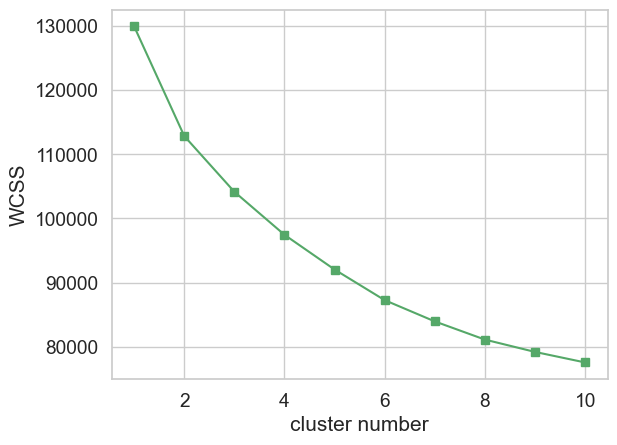

In [81]:
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 2024)
    kmeans.fit(features) 
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("cluster number")
plt.ylabel('WCSS')
plt.show()

Using elbow method we can't really distinguish number of clusters after which addditional cluster would have diminishing effect

We will go with 4 clusters

In [82]:
kmeans=KMeans(n_clusters=4, random_state = 2024)
kmeans.fit(features)

/Users/anfrejter/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=2024)

Now we have clusters, in order to visualize result we will perform PCA to reduce dimension of our data to 2

In [96]:
pca=PCA(n_components=2)

In [97]:
reduced_features = pd.DataFrame(data=pca.fit_transform(features),columns=['PCA1','PCA2'])

In [98]:
reduced_features

,PCA1,PCA2
0,0.527275,-0.576376
1,-0.723904,1.179146
2,-0.146887,0.661054
3,-2.343407,1.599688
4,-0.334352,1.385978
...,...,...
7636,0.076382,1.736811
7637,-0.115219,3.154635
7638,-0.080341,0.082650
7639,0.211974,0.368174


In [100]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=data.drop(columns=["Attrition_Flag","Gender","Marital_Status","CLIENTNUM"]).dropna().columns)

In [101]:
component_df

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
PCA1,-0.000680,0.066117,-0.005703,0.361055,0.311757,0.001327,-0.113871,-0.016662,-0.001291,0.519988,-0.099241,0.528240,-0.009135,0.193094,0.131246,-0.012361,-0.375198
PCA2,-0.266385,0.088098,-0.006231,-0.154980,0.076706,-0.263426,-0.262829,-0.097453,-0.188253,-0.073778,0.190352,-0.090579,0.118481,0.528745,0.542625,0.186877,0.187276


<Axes: >

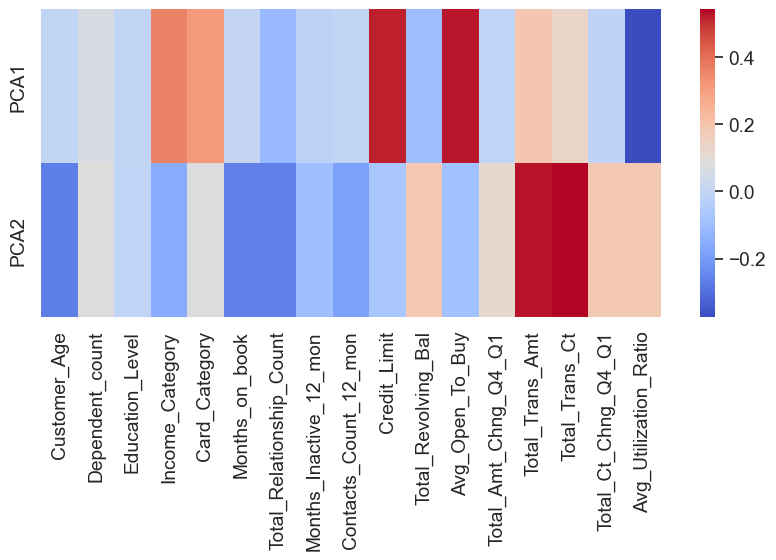

In [126]:
plt.figure(figsize=(10, 4))
sns.heatmap(component_df,cmap = 'coolwarm')

High PCA1 -> High income, "premium" card, high credit limit, high Avg_Open_To_Buy? ,high transaction count and amount, low utilization 

High PCA2 -> young, low income, low month on book, low number of products, low contracts in last 12 months, high revolving balance, v hign transaction amount and count, high utilization

## Plot of clusters

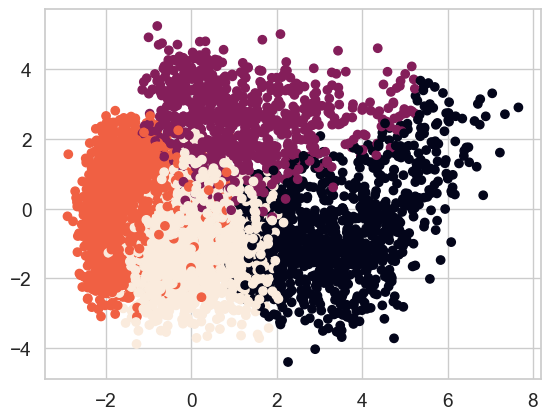

In [117]:
plt.scatter(reduced_features['PCA1'],reduced_features['PCA2'],c=kmeans.labels_)

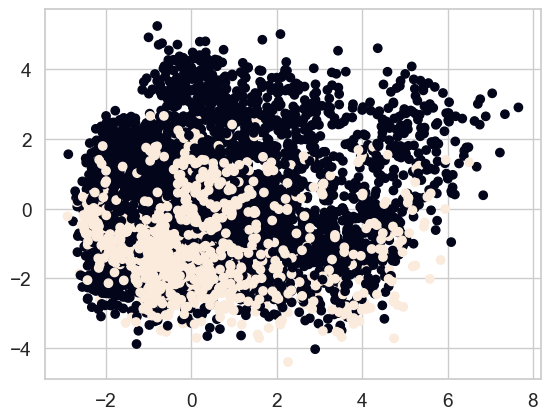

In [118]:
plt.scatter(reduced_features['PCA1'],reduced_features['PCA2'],c=data.drop(columns=["Gender","Marital_Status","CLIENTNUM"]).dropna()['Attrition_Flag'].to_list())

# Dataset splitting